In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def sigmoid(inputs):
  output = 1 / (1 + np.exp(-inputs))
  return output

def sigmoid1(inputs):                                                           # first derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)
  return temp2

def sigmoid2(inputs):                                                           # Second derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-2*temp1)
  return temp2

def sigmoid3(inputs):                                                           # Third derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-6*temp1+6*(temp1**2))
  return temp2


In [3]:

def sigmoid_for_k(input,k):
  if k ==0:
    return sigmoid(input)
  elif k == 1:
    return sigmoid1(input)
  elif k ==2:
    return sigmoid2(input)
  elif k == 3:
    return sigmoid3(input)

In [4]:
def layer1NN(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  lin_out = weights.T * inputs + biases.T                                        # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out

In [5]:
def der_NN_xj_k(p,inputs,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  temp1 = weights**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T * inputs + biases.T

  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4

In [6]:
def error3(p,inputs):
  # x.resize((len(inputs),1))
  a = 2 + 2*inputs/5 + inputs**2
  b = 4*inputs + (inputs**2)/5
  c = inputs**2
  d = 1/5 + inputs + (np.exp(-inputs/5)*np.cos(inputs))/5

  _, N = layer1NN(p,inputs)
  DN = der_NN_xj_k(p,inputs ,k=1)
  DN2 = der_NN_xj_k(p,inputs ,k=2)
  temp1 = (a*N + b*DN + c*DN2 + d)
  return temp1@temp1.T

In [7]:
def layer1NN(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  lin_out = weights.T * inputs + biases.T                                        # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out

def der_NN_xj_k(p,inputs,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  temp1 = weights**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T * inputs + biases.T

  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4


def der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=0):              # This calculates D_Ng/D_v
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T * inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp1 = ((weights**k) * (sigmoid_for_k(lin_out,k).T) )
  return temp1                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=0):              # This calculates D_Ng/D_u
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T * inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp1 = weights**k
  temp2 = nweights * temp1
  # temp2.reshape(weights[j].shape)
  temp3 = (sigmoid_for_k(lin_out,k+1).T * temp2)
  return temp3                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=0):              # This calculates D_Ng/D_w


  x = inputs


  lin_out = weights.T * inputs + biases.T


  temp1 = ((nweights*(weights**k)) * (sigmoid_for_k(lin_out,k+1).T) )
  temp2 = x
  temp3 = temp2 * (temp1.T)
  temp3 = temp3.T

  if k >0:
    temp4 = k*((nweights*(weights**(k-1))) * (sigmoid_for_k(lin_out,k).T) )
    return temp3 + temp4

  return temp3

In [8]:
def grad3(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  output = weights.T * inputs + biases.T

  sig = sigmoid(output)
  sig1 = sigmoid1(output)
  sig2 = sigmoid2(output)
  sig3 = sigmoid3(output)

  a = 2 + 2*inputs/5 + inputs**2
  b = 4*inputs + (inputs**2)/5
  c = inputs**2
  d = 1/5 + inputs + (np.exp(-inputs/5)*np.cos(inputs))/5


  D2N_DX2_V = der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=2)
  DN_DX_V = der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=1)
  DN_V = der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=0)
  err_for_T_V = a*DN_V.T + b*DN_DX_V.T + c*D2N_DX2_V.T

  D2N_DX2_U = der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=2)
  DN_DX_U = der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=1)
  DN_U = der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=0)
  err_for_T_U = a*DN_U.T + b*DN_DX_U.T + c*D2N_DX2_U.T

  D2N_DX2_W = der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=2)
  DN_DX_W = der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=1)
  DN_W = der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=0)

  err_for_T_W = a*DN_W.T + b*DN_DX_W.T + c*D2N_DX2_W.T



  _, N = layer1NN(p,inputs)
  DN = der_NN_xj_k(p,inputs ,k=1)
  DN2 = der_NN_xj_k(p,inputs ,k=2)
  err = (a*N + b*DN + c*DN2 + d)



  DW = err @ err_for_T_W.T
  DU = err @ err_for_T_U.T
  DV = err @ err_for_T_V.T


  dp = np.array([DW,DU,DV])
  dp = dp.reshape(1,len(p))

  return dp[0]

## Using 'nelder-mead'

In [9]:
inputs = np.linspace(0,2,10)


n_inputs = 1
n_neurons =10

p3 = np.random.randn(1,3*n_neurons)
# p = np.ones((1,3*n_neurons))
p3 =p3[0]

In [10]:
error3(p3,inputs)

array([[1346.04071439]])

In [11]:
res3 = minimize(error3,p3, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})

<ipython-input-11-b34960b5c483>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res3 = minimize(error3,p3, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})


In [12]:
error3(res3.x,inputs)

array([[5.20049505e-05]])

In [13]:
def my_function3(x):
    temp1 = np.exp(-x / 5)
    temp2 = np.sin(x)


    result = temp1*temp2
    return result

In [14]:
x_test = np.linspace(0,4,100)


_, N = layer1NN(res3.x,x_test)
yt = x_test  + (x_test**2)*N
ya = my_function3(x_test)

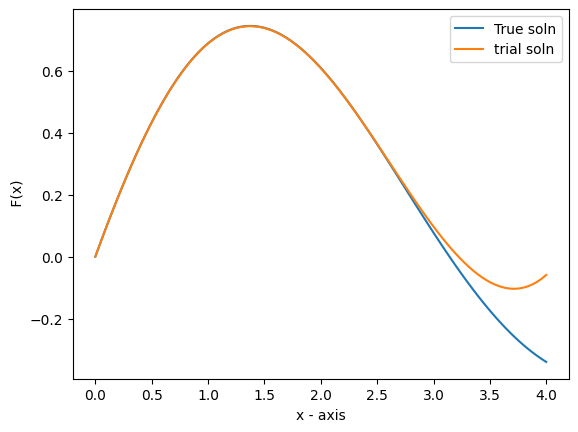

In [15]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.xlabel('x - axis')
plt.ylabel(' F(x)')
plt.legend()

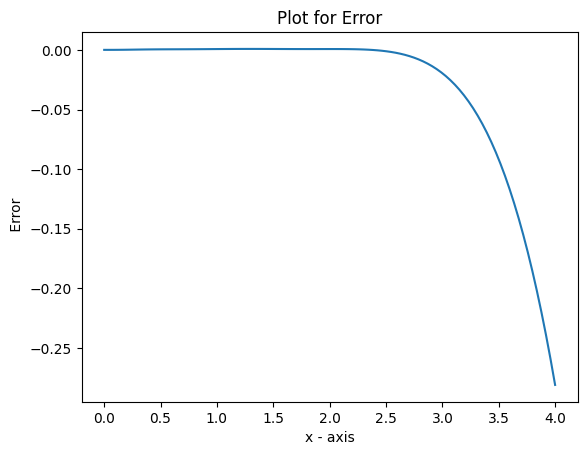

In [16]:

plt.plot(x_test,(( ya-yt).reshape(100,1)))
plt.title('Plot for Error')
plt.xlabel('x - axis')
plt.ylabel(' Error')
plt.show()

## Using 'BFGS'

In [17]:
res3 = minimize(error3,p3, method='BFGS', jac=grad3,args=(inputs), options={ 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 76
         Function evaluations: 97
         Gradient evaluations: 97


In [18]:
error3(res3.x,inputs)

array([[3.64123394e-09]])

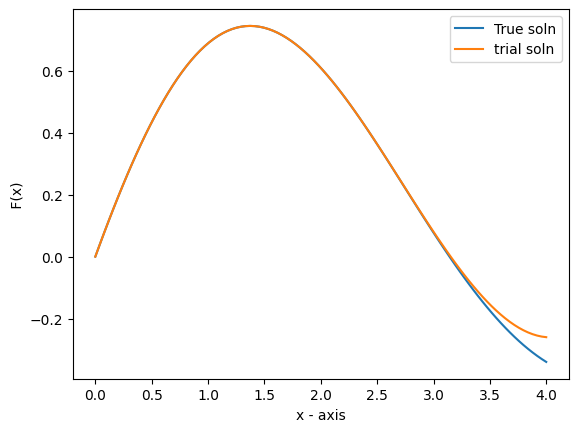

In [19]:
_, N = layer1NN(res3.x,x_test)
yt = x_test  + (x_test**2)*N
ya = my_function3(x_test)


plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.xlabel('x - axis')
plt.ylabel(' F(x) ')
plt.legend()

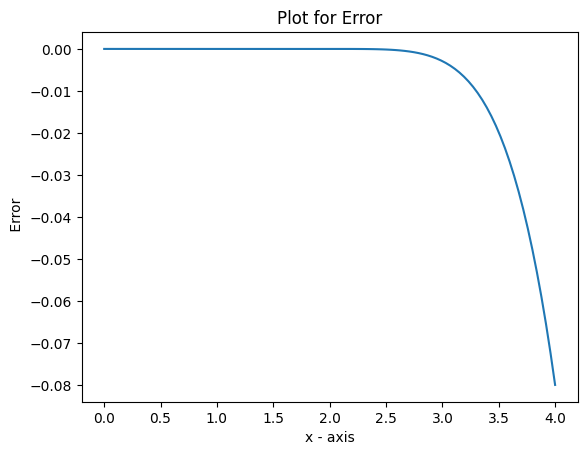

In [20]:

plt.plot(x_test,(( ya-yt).reshape(100,1)))
plt.title('Plot for Error')
plt.xlabel('x - axis')
plt.ylabel(' Error')
plt.show()

Error Plots for different Training points and Different Hidden units

In [21]:
def error_min_train_hidd(neurons, train_points):
  # Training Points                                                               # Intial Values
  x_train = np.linspace(0,2,train_points)

  n_inputs = 1
  n_neurons = neurons
  p = np.random.randn(1,3*n_neurons)
  p =p[0]
  res = minimize(error3, p, method='BFGS', jac=grad3,args=(x_train), options={ 'disp': False})
  return res.x

In [ ]:
def plot_for_diff_hidd_units(list_neurons, train_points):
  x_test = np.linspace(0,2,100)
  for neurons in list_neurons:
    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(neurons, train_points)


      _, N = layer1NN(weights ,x_test)
      yi = x_test  + (x_test**2)*N
      ysum += yi
    yt = ysum/run
    ya = my_function3(x_test)
    plt.plot(x_test,((ya - yt).reshape(100,1)),label = 'error for hidden units = {}'.format(neurons))
  plt.legend()
  plt.title('No. of Training points are {}'.format(train_points))
  plt.xlabel('x - axis')
  plt.ylabel(' Error')
  plt.show()

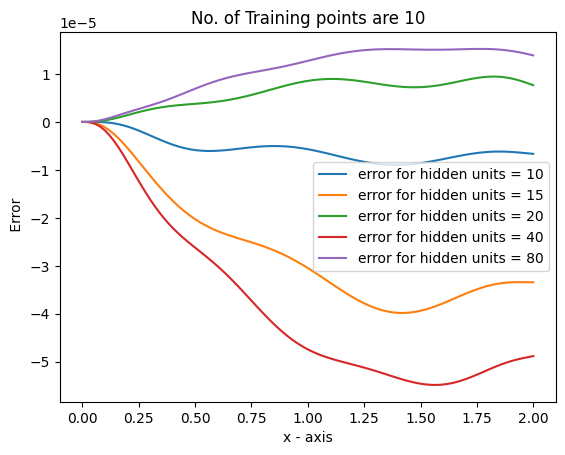

In [ ]:
list_neuron = [10,15,20,40,80]
plot_for_diff_hidd_units(list_neuron, 10)

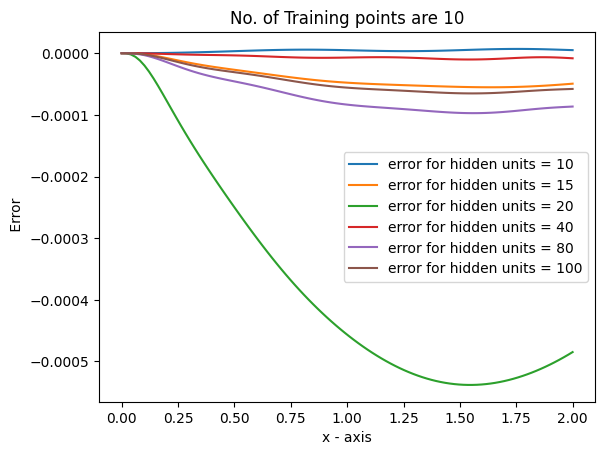

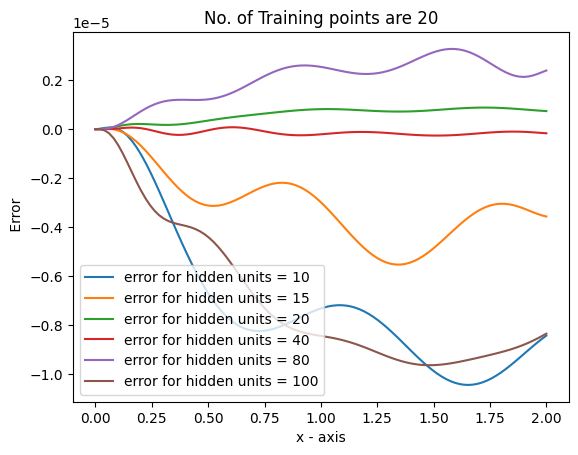

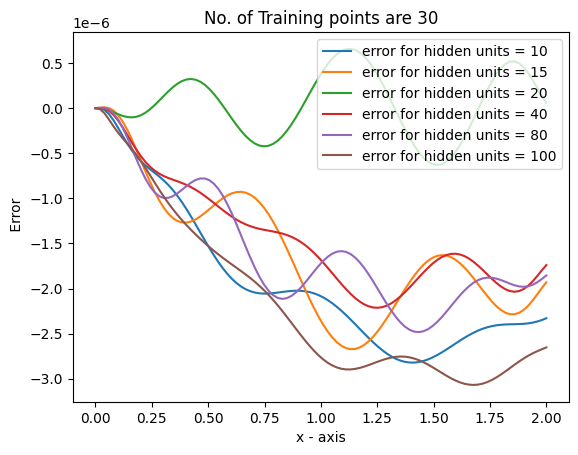

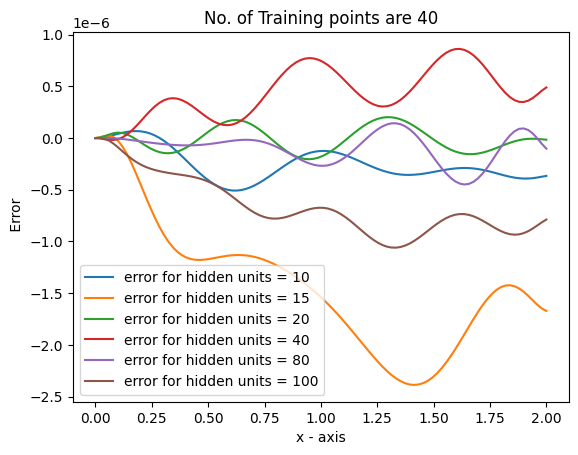

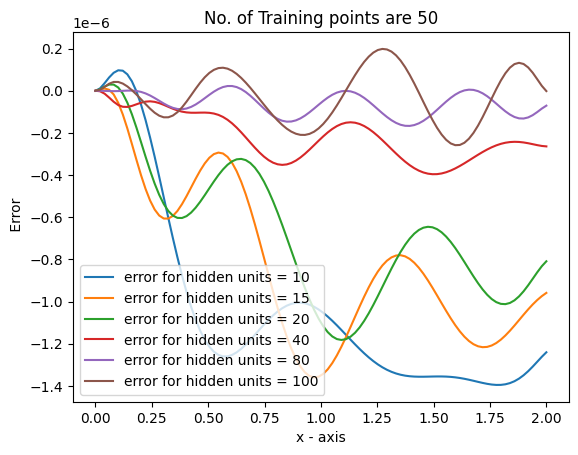

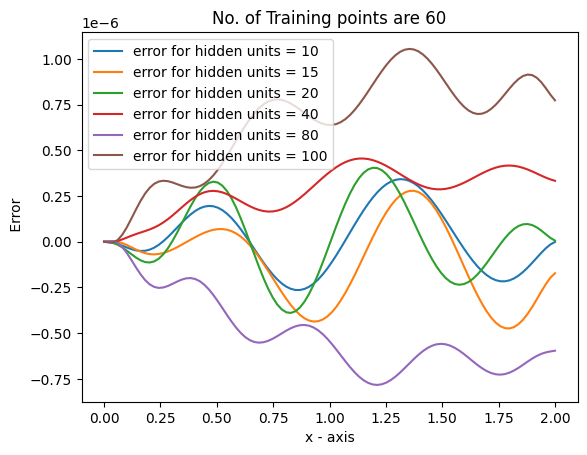

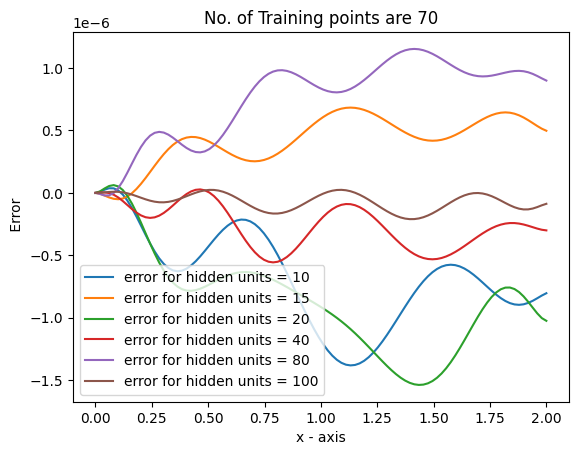

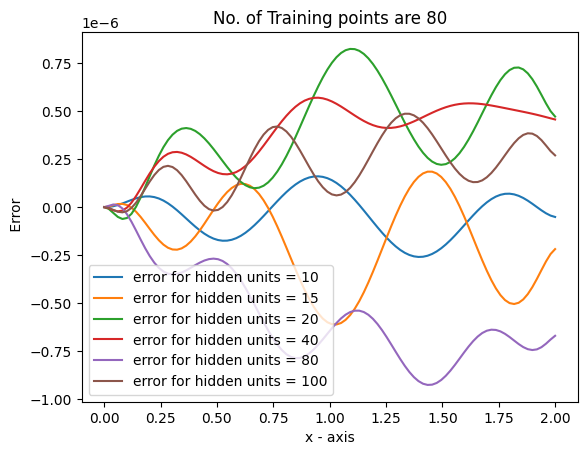

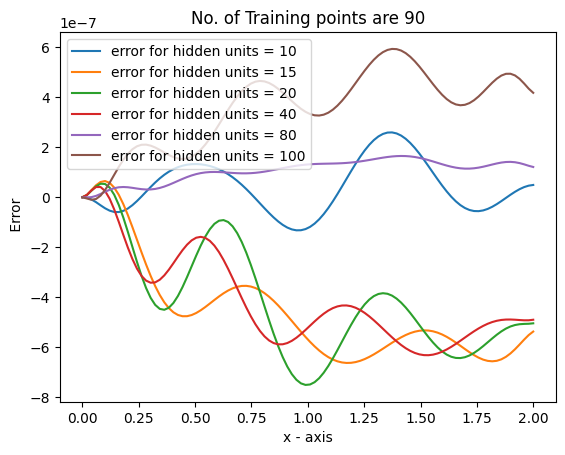

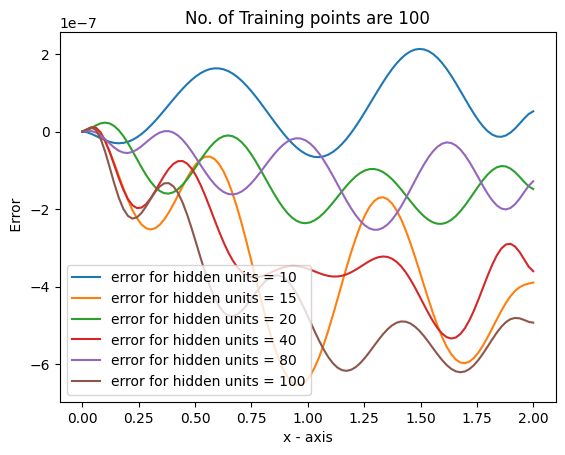

In [ ]:
for i in range(10,110,10):
  list_neuron = [10,15,20,40,80,100]
  plot_for_diff_hidd_units(list_neuron, i)

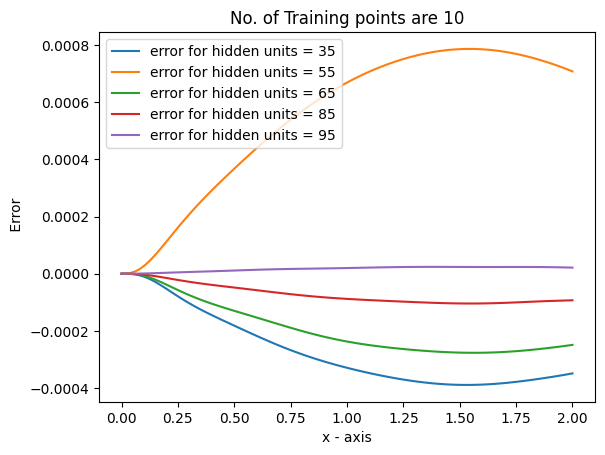

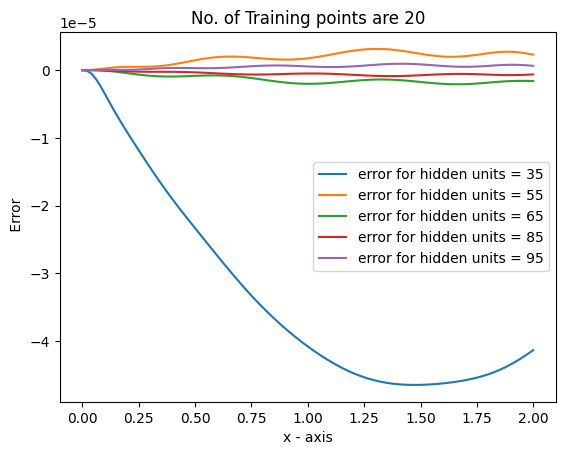

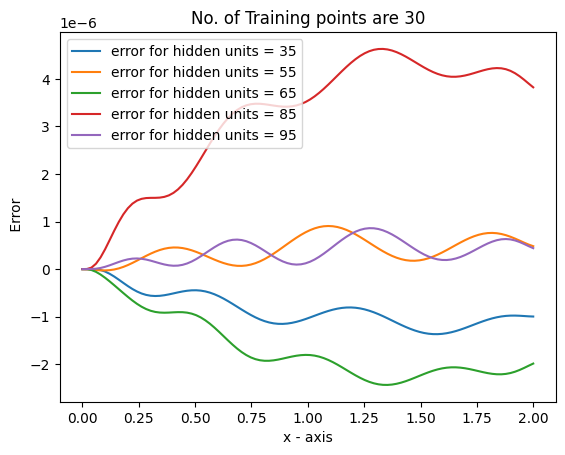

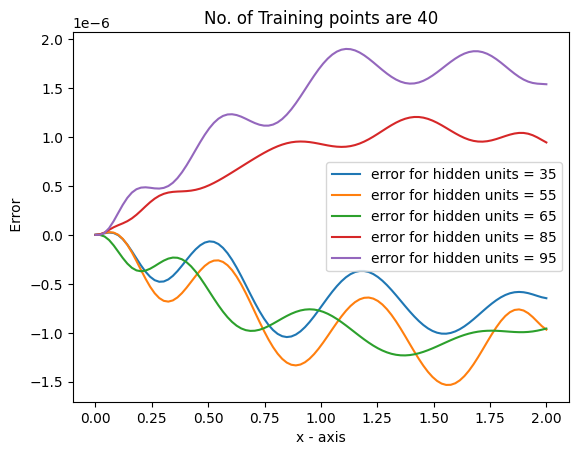

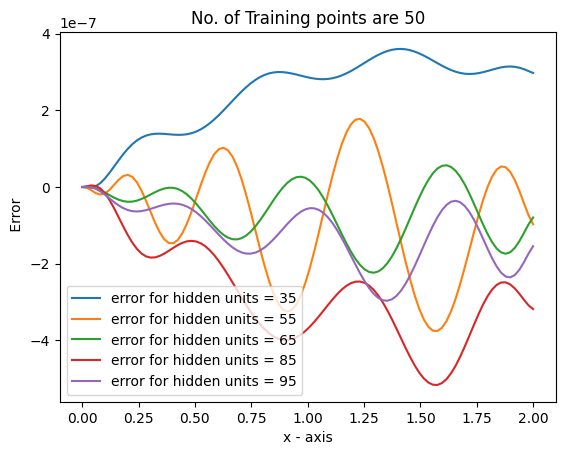

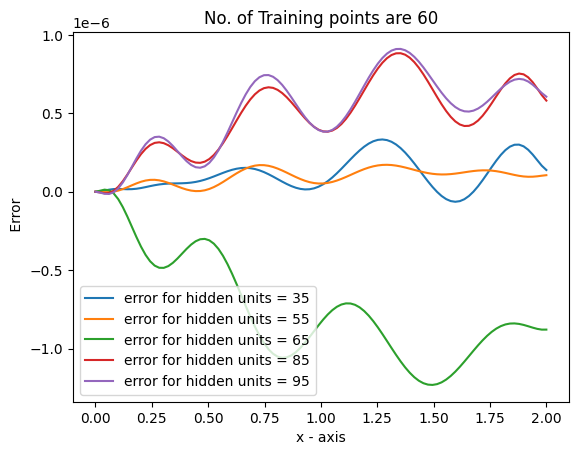

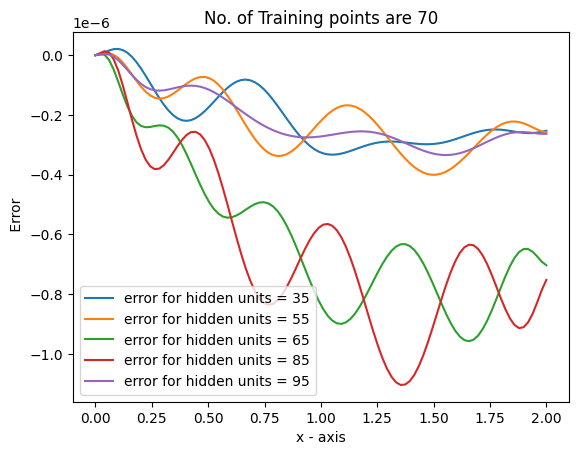

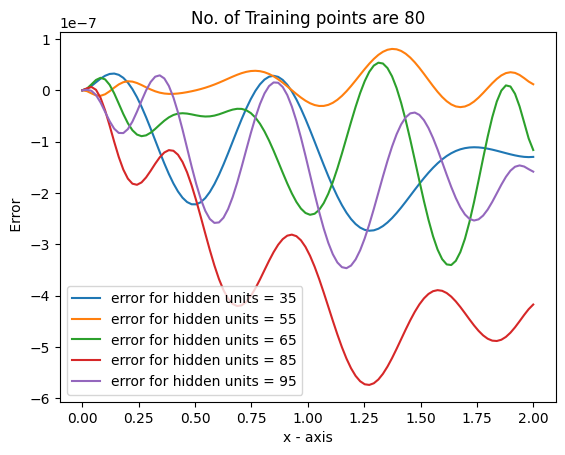

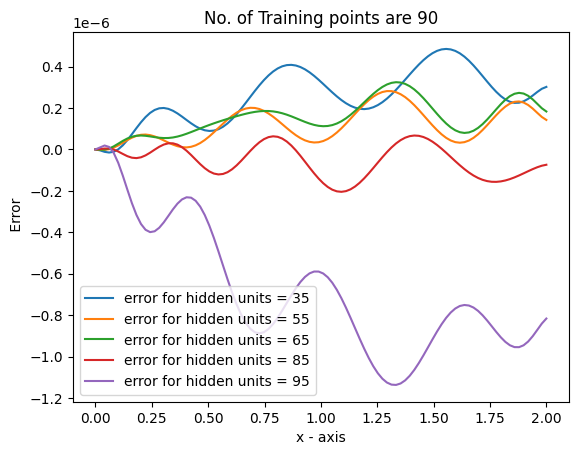

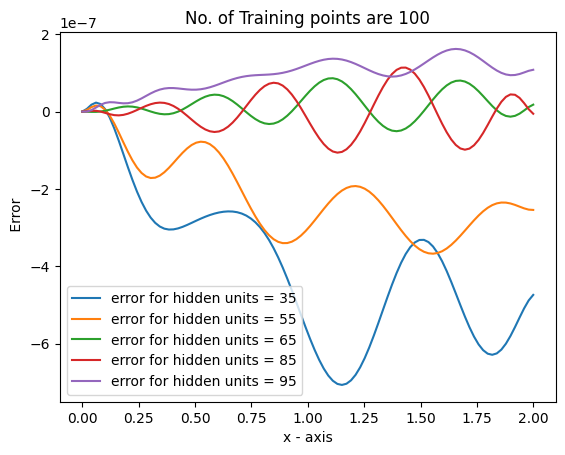

In [ ]:
for i in range(10,110,10):
  list_neuron = [35,55,65,85,95]
  plot_for_diff_hidd_units(list_neuron, i)

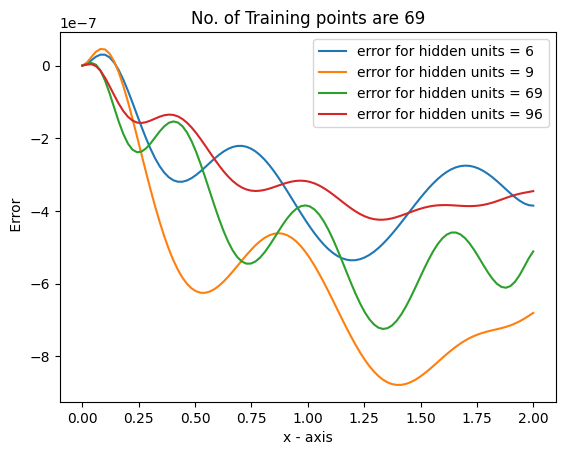

In [ ]:
  list_neuron = [6,9,69,96]
  plot_for_diff_hidd_units(list_neuron, 69)

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login(key='da5365b4335ad8c7a1df7f3653ec9d0b092e8b09')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# You need to define a config file in the form of dictionary or yaml
sweep_config = {
    'method': 'grid',
    'name': 'sweep Hidden Units Training Datasets',
    'metric': {
        'name': 'Error',
        'goal': 'minimize'
    },
    'parameters': {
        'hiddenUnits': {
            'values': [i for i in range(10, 105, 5)]
        },
        'trainingPoints': {
            'values': [i for i in range(10, 110, 10)]
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='ANN_Proj_Ques_3a_new_2')

Create sweep with ID: z430cyt9
Sweep URL: https://wandb.ai/shubham821/ANN_Proj_Ques_3a_new_2/sweeps/z430cyt9


In [ ]:
import wandb
import numpy as np
from scipy.optimize import minimize

def Error(config):
    hiddenUnits = config['hiddenUnits']
    trainingPoints = config['trainingPoints']
    x_test = np.linspace(0, 2, 100)

    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(hiddenUnits, trainingPoints)


      _, N = layer1NN(weights ,x_test)
      yi = x_test  + (x_test**2)*N
      ysum += yi
    yt = ysum/run
    ya = my_function3(x_test)
    err = np.linalg.norm(yt-ya)

    wandb.log({"Error": err})



In [ ]:
def main():
    '''
    WandB calls main function each time with different combination.

    We can retrieve the same and use the same values for our hyperparameters.
    '''
    with wandb.init() as run:
        run_name = "-Hidd_units" + str(wandb.config.hiddenUnits) + "-Train_points_" + str(wandb.config.trainingPoints)
        wandb.run.name = run_name
        #obj=NN(wandb.config['num_layers'],wandb.config['hidden_size'])

        Error(wandb.config)

wandb.agent(sweep_id, function=main)  # calls main function for count number of times.
wandb.finish()

wandb: Agent Starting Run: 36lnn9y7 with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 10
wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
wandb.finish()

In [22]:
def plot_error_variance(neurons, train_points):
  x_test = np.linspace(0,2,100)
  ya = my_function3(x_test)
  run = 20
  lst = []
  for i in range(20):
      weights = error_min_train_hidd(neurons, train_points)
      _, N = layer1NN(weights ,x_test)
      yi = x_test  + (x_test**2)*N
      err = ((ya - yi).reshape(100,1))
      lst.append(err)
  lst = np.array(lst)
  mean_line = np.mean(lst, axis=0).reshape(100,)
  std_dev = np.std(lst, axis=0).reshape(100,)
  plt.plot(x_test, mean_line, color='blue', label='Mean')
  plt.fill_between(x_test, mean_line - std_dev, mean_line + std_dev, color='grey', alpha=0.5, label='Std Dev')
  plt.xlabel('X')
  plt.ylabel('Error')
  plt.title(f'Mean and Standard Deviation of 20 Error plots with Training points {train_points} and Hidden units {neurons}')
  plt.legend()
  plt.show()

In [28]:
import time
def calc_time(nums, neurons, train_points):
  iter = nums
  elapsed_times = np.zeros(nums)
  for i in range(iter):
    start_time = time.time()
    weights = error_min_train_hidd(neurons, train_points)
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times[i] = elapsed_time
  print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
  print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")


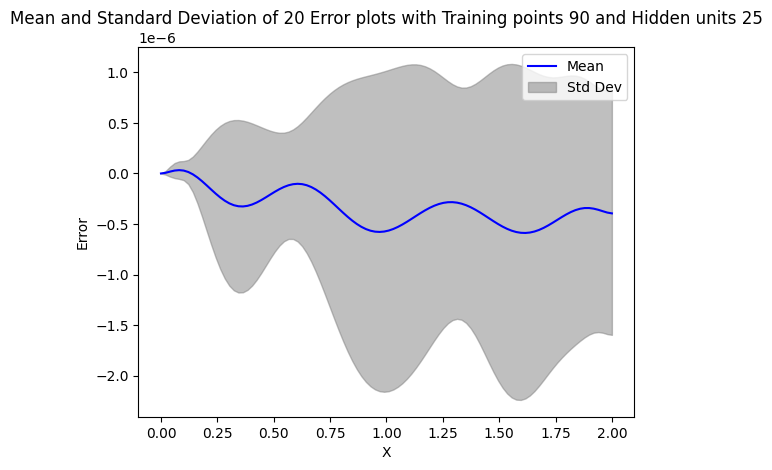

Mean time taken: 0.563798 seconds
Standard deviation: 0.344687 seconds


In [29]:
plot_error_variance(25, 90)
calc_time(100,25, 90)

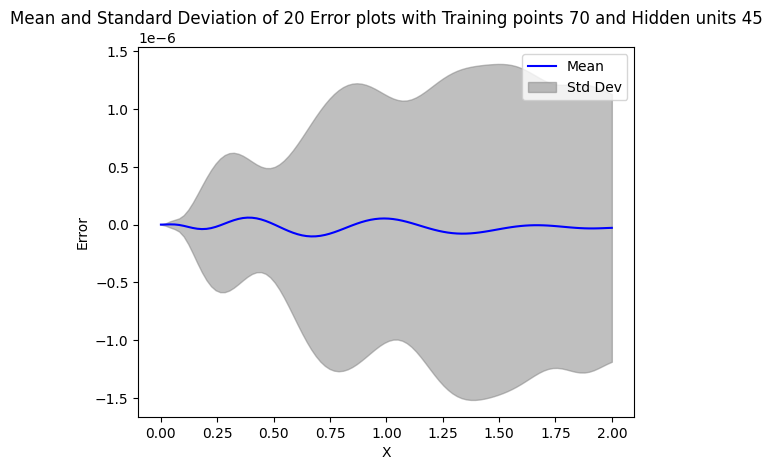

Mean time taken: 0.852681 seconds
Standard deviation: 0.675234 seconds


In [30]:
plot_error_variance(45, 70)
calc_time(100,45, 70)

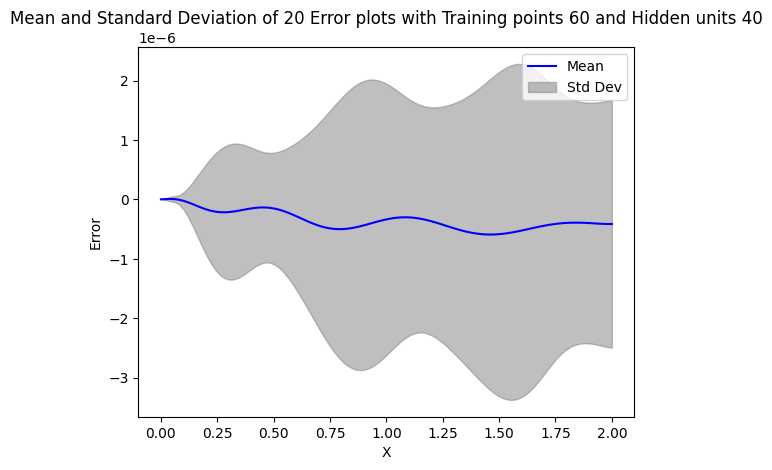

Mean time taken: 0.575902 seconds
Standard deviation: 0.378526 seconds


In [31]:
plot_error_variance(40, 60)
calc_time(100,40, 60)

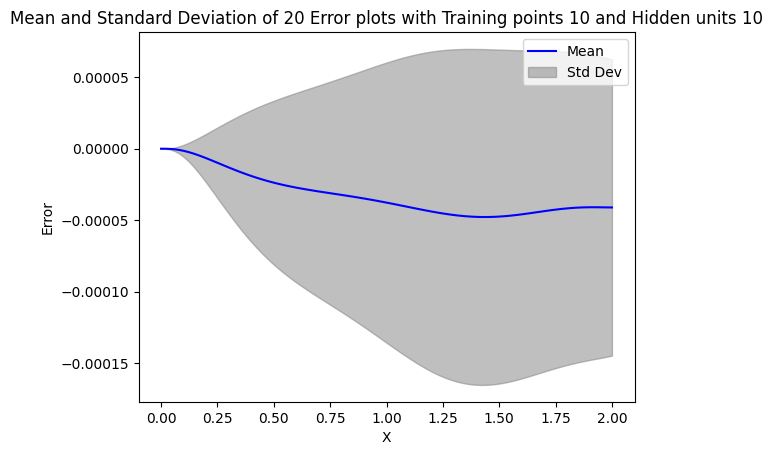

Mean time taken: 0.085349 seconds
Standard deviation: 0.056551 seconds


In [32]:
plot_error_variance(10,10)
calc_time(100,10,10)